Regresion
https://drive.google.com/file/d/1PDYKuc0Ly7iBjG81voDPiVHmDY0o0Zmw/view?usp=sharing


El dataset de startups contiene variables como gastos en
investigación y desarrollo (I+D), costos administrativos, gastos en
marketing, ubicación geográfica y beneficios netos.
Este tipo de datos es esencial para entender el rendimiento
financiero y operativo de una startup, lo cual es crítico para la
toma de decisiones tanto para los inversionistas como para la
administración de la empresa.

a. Análisis Exploratorio de Datos (EDA) ¿Qué conclusiones
puede sacar con respecto a las distribuciones de las
variables numéricas y las relaciones entre ellas?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df = pd.read_csv("emprendimientos.csv")

In [3]:
emprendimientos = df.copy()

In [4]:
emprendimientos

,Unnamed: 0,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
0,0,165349.200000,136897.800000,471784.100000,New York,192261.830000,Energy,227095.722346,289,Series A,608681.900000
1,1,162597.700000,151377.590000,443898.530000,California,191792.060000,Tech,224711.757208,217,Series B,595276.120000
2,2,153441.510000,101145.550000,407934.540000,Florida,191050.390000,Finance,222717.429984,407,Series C,509080.090000
3,3,144372.410000,118671.850000,383199.620000,New York,182901.990000,Finance,214017.365199,383,Series A,501871.470000
4,4,142107.340000,91391.770000,366168.420000,Florida,166187.940000,Finance,196476.965990,351,Series B,457560.190000
...,...,...,...,...,...,...,...,...,...,...,...
65,65,134093.502036,47327.344651,26681.272559,California,105423.930052,Tech,120378.804381,335,Seed,74008.617209
66,66,83460.960473,102975.139152,287058.802746,New York,-21313.506762,Healthcare,-14885.847169,430,Seed,390033.941898
67,67,111737.965689,125193.850785,73364.287453,New York,187372.314677,Finance,197551.192890,367,Seed,198558.138238
68,68,28077.387719,2743.241602,294652.768452,New York,62478.033370,Healthcare,64877.719983,258,Seed,297396.010053


In [5]:
emprendimientos = emprendimientos.drop(columns=['Unnamed: 0'])


In [6]:
import pandas as pd

def validate_columns(df):
    # Initialize an empty list to store validation results
    validation_results = []

    # Loop through each column in the input DataFrame
    for col in df.columns:
        # Calculate the number of unique values
        num_unique_values = df[col].nunique()

        # Calculate the number of null values
        num_null_values = df[col].isnull().sum()

        # Calculate the percentage of null values
        percent_null_values = (num_null_values / len(df)) * 100

        # Get sample unique values
        sample_unique_values = df[col].dropna().sample(min(num_unique_values, 5)).tolist()

        # Create a dictionary with the validation results for the current column
        validation_results.append({
            'Column': col,
            'Unique_Values': df[col].unique(),
            'Num_Unique_Values': num_unique_values,
            'Num_Null_Values': num_null_values,
            'Sample_Unique_Values': sample_unique_values,
            '%_null' : percent_null_values
        })

    # Convert the list of dictionaries to a DataFrame
    validation_df = pd.DataFrame(validation_results)

    return validation_df

In [7]:
validate_columns(emprendimientos)

,Column,Unique_Values,Num_Unique_Values,Num_Null_Values,Sample_Unique_Values,%_null
0,RnD_Expenditure,"[165349.2, 162597.7, 153441.51, 144372.41, 142...",69,0,"[37252.04227553418, 29351.17816342261, 65605.4...",0.0
1,Admin_Costs,"[136897.8, 151377.59, 101145.55, 118671.85, 91...",70,0,"[96189.63, 131721.37551441198, 182645.56, 1452...",0.0
2,Marketing_Expenditure,"[471784.1, 443898.53, 407934.54, 383199.62, 36...",68,0,"[65014.28605913884, 249744.55, 229160.95, 1277...",0.0
3,Location,"[New York, California, Florida]",3,0,"[Florida, California, Florida]",0.0
4,Net_Profit,"[192261.83, 191792.06, 191050.39, 182901.99, 1...",70,0,"[156991.12, 192261.83, 108733.99, 144259.4, 18...",0.0
5,Industry_Sector,"[Energy, Tech, Finance, Healthcare, Retail]",5,0,"[Tech, Finance, Tech, Tech, Retail]",0.0
6,Profit,"[227095.7223459677, 224711.75720836723, 222717...",70,0,"[34167.92215244206, 112491.43342569692, 48501....",0.0
7,Employee_Count,"[289, 217, 407, 383, 351, 58, 315, 79, 179, 17...",68,0,"[497, 151, 393, 302, 10]",0.0
8,Investment_Round,"[Series A, Series B, Series C, IPO, Seed]",5,0,"[Seed, Series A, Series A, Series C, Series B]",0.0
9,Operational_Cost,"[608681.8999999999, 595276.12, 509080.09, 5018...",70,0,"[426102.01, 410519.76, 300793.76, 409095.36, 1...",0.0


No hay valores nulos, por los cual sigo con el análisis

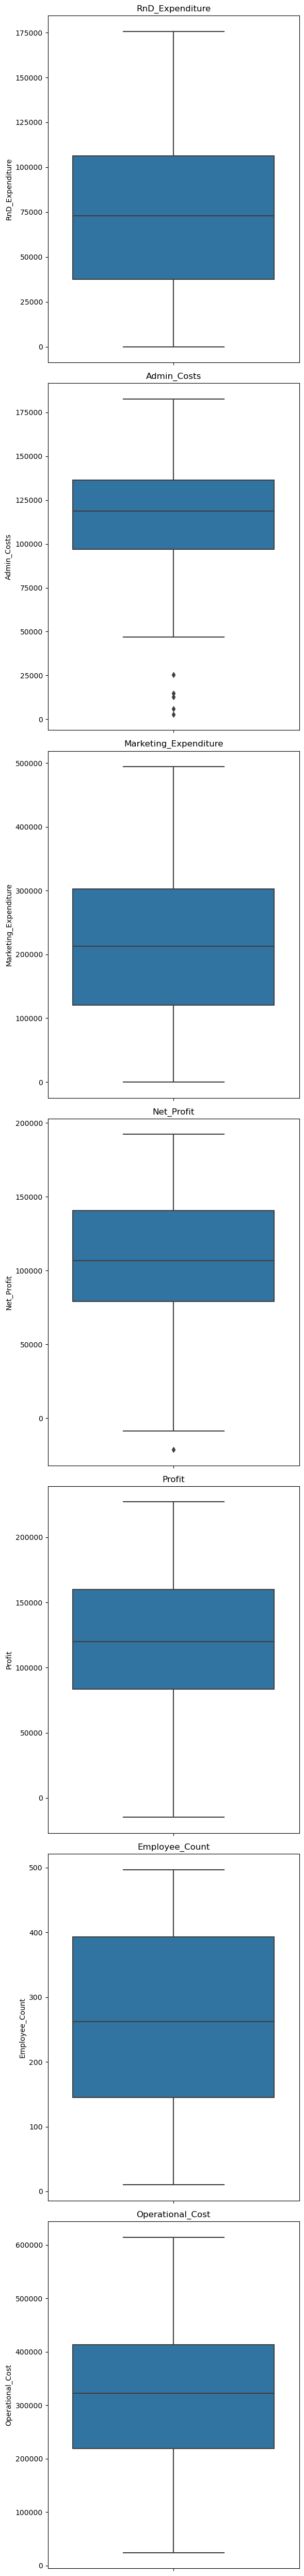

In [8]:
cols = emprendimientos.select_dtypes(include=['number']).columns

filas = len(cols)
columnas = 1

fig, axes = plt.subplots(filas, columnas, figsize=(6,50 ))

for i, columna in enumerate(cols):
    sns.boxplot(y=emprendimientos[columna], ax=axes[i])
    axes[i].set_title(columna)

plt.tight_layout()
plt.show()

In [9]:
emprendimientos.describe()

,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Net_Profit,Profit,Employee_Count,Operational_Cost
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,73645.768116,110300.346605,212932.971333,108074.578648,120746.497961,264.500000,323233.317938
std,46643.653676,39611.402919,129284.203274,49144.596277,55478.853960,141.087983,135322.611919
min,0.000000,2743.241602,0.000000,-21313.506762,-14885.847169,10.000000,24435.504010
25%,37578.659207,96962.557500,120540.355000,78931.372500,83428.580072,144.750000,219525.129324
50%,73051.080000,118608.950000,212716.240000,106661.195882,119810.725266,262.000000,322937.665000
75%,106300.780101,136547.117500,302423.767500,140623.042127,160098.271102,393.000000,413510.677500
max,175623.487278,182645.560000,494430.544453,192261.830000,227095.722346,497.000000,614542.229755
